In [1]:
import netCDF4 as nc

import matplotlib.pyplot as plt
import numpy as np
import os
import re

%matplotlib inline

resultsDir='/data/eolson/MEOPAR/SS2DSOGruns/'
N2chl=1.600

In [2]:
TS=nc.Dataset(os.path.join(resultsDir,'TS_uniform.nc'))

In [3]:
# read z, T, S into CTD
CTD=np.loadtxt('/data/eolson/SOG/SOG-initial/ctd/SG-S3-2004-10-19.sog',skiprows=12,usecols=(1, 4, 2, 8))

In [4]:
nuts=np.loadtxt('/data/eolson/SOG/SOG-initial/stratogem_nuts/Nuts-S3-2004-10-19.sog', skiprows=12, usecols=(0,1,2))

In [5]:
print(CTD.shape)

(237, 4)


In [6]:
# add z=0 at first row, repeating T,S values from next level
data=np.vstack((CTD[0,:],CTD))
data[0,0]=0.
# interpolate to T-points
data_f=(data[0:401:4,:]+data[1:402:4,:])/2
#zs=data_f[:,0]
zs=np.arange(0.5,404,4)
fluor=data_f[:,0]

In [7]:
# Remove records with negative data values (typically -99.0 or
# -99999) because that indicates invalid data
data_qty=nuts[:,1]
mask = (data_qty >= 0.0)
data_records = len(data_qty[mask])
qty_clean = data_qty[mask]
depth_clean= nuts[:,0][mask]
# Calculate depth and quantity differences from field data for use
# in interpolation
del_depth = depth_clean[1:data_records] - depth_clean[0:data_records-1]
del_qty = qty_clean[1:data_records] - qty_clean[0:data_records-1]
# Interpolate quantity values at grid point depths
i_data = 1
NO=0.0*zs
for i_g in range(0, len(zs)):
    if (zs[i_g] > depth_clean[i_data]):
        while ((zs[i_g] > depth_clean[i_data]) and (i_data<data_records-1)):
            i_data = i_data + 1
    NO[i_g] = qty_clean[i_data-1] + del_qty[i_data-1] \
        * ((zs[i_g] - depth_clean[i_data-1]) \
        / del_depth[i_data-1])
print( NO)

[  9.2083     6.7867     6.8795     9.499875  13.421275  17.342675
  21.264075  25.185475  26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656     26.656     26.656     26.656     26.656
  26.656     26.656     26.656   

In [8]:
# Remove records with negative data values (typically -99.0 or
# -99999) because that indicates invalid data
data_qty=nuts[:,2]
mask = (data_qty >= 0.0)
data_records = len(data_qty[mask])
qty_clean = data_qty[mask]
depth_clean= nuts[:,0][mask]
# Calculate depth and quantity differences from field data for use
# in interpolation
del_depth = depth_clean[1:data_records] - depth_clean[0:data_records-1]
del_qty = qty_clean[1:data_records] - qty_clean[0:data_records-1]
# Interpolate quantity values at grid point depths
i_data = 1
Si=0.0*zs
for i_g in range(0, len(zs)):
    if (zs[i_g] > depth_clean[i_data]):
        while ((zs[i_g] > depth_clean[i_data]) and (i_data<data_records-1)):
            i_data = i_data + 1
    Si[i_g] = qty_clean[i_data-1] + del_qty[i_data-1] \
        * ((zs[i_g] - depth_clean[i_data-1]) \
        / del_depth[i_data-1])
print (Si)

[ 26.4974    19.9806    19.1989    22.887125  28.765725  34.644325
  40.522925  46.401525  48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606     48.606     48.606     48.606     48.606
  48.606     48.606     48.606   

In [9]:
# Remove records with negative data values (typically -99.0 or
# -99999) because that indicates invalid data
data_qty=data_f[:,1]
mask = (data_qty >= 0.0)
data_records = len(data_qty[mask])
qty_clean = data_qty[mask]
depth_clean= data_f[:,0][mask]
# Calculate depth and quantity differences from field data for use
# in interpolation
del_depth = depth_clean[1:data_records] - depth_clean[0:data_records-1]
del_qty = qty_clean[1:data_records] - qty_clean[0:data_records-1]
# Interpolate quantity values at grid point depths
i_data = 1
P=0.0*zs
for i_g in range(0, len(zs)):
    if (zs[i_g] > depth_clean[i_data]):
        while ((zs[i_g] > depth_clean[i_data]) and (i_data<data_records-1)):
            i_data = i_data + 1
    P[i_g] = qty_clean[i_data-1] + del_qty[i_data-1] \
        * ((zs[i_g] - depth_clean[i_data-1]) \
        / del_depth[i_data-1])
P[zs>150]=0.0
print (P)

[ 3.8466   3.7368   4.09165  2.5437   1.9894   1.40535  0.8233   0.7658
  0.60465  0.4067   0.3163   0.274    0.20185  0.19635  0.19445  0.1612
  0.1635   0.14605  0.142    0.14815  0.13355  0.1346   0.1437   0.1261
  0.12365  0.1036   0.0973   0.095    0.1037   0.0991   0.1036   0.08835
  0.0954   0.10325  0.09625  0.10175  0.1014   0.0882   0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.     ]


In [10]:
print(np.shape(NO))
print(data_f[:,1])

(101,)
[ 3.8466   3.7368   4.09165  2.5437   1.9894   1.40535  0.8233   0.7658
  0.60465  0.4067   0.3163   0.274    0.20185  0.19635  0.19445  0.1612
  0.1635   0.14605  0.142    0.14815  0.13355  0.1346   0.1437   0.1261
  0.12365  0.1036   0.0973   0.095    0.1037   0.0991   0.1036   0.08835
  0.0954   0.10325  0.09625  0.10175  0.1014   0.0882   0.0993   0.10165
  0.09905  0.0943   0.10115  0.09885  0.1036   0.0998   0.0946   0.10165
  0.10375  0.1015   0.1037   0.1037   0.1037   0.10585  0.1194   0.1169
  0.1154   0.11485  0.11725  0.1265 ]


In [11]:
# create temp and sal arrays with correct dimensions
vecNO=np.reshape(NO,(101,1,1))
data_NO=np.tile(vecNO,(1,1,10,1100))
vecSi=np.reshape(Si,(101,1,1))
data_Si=np.tile(vecSi,(1,1,10,1100))
print (data_Si.shape)
vecP=0.33*np.reshape(P,(101,1,1))/N2chl
data_PHY=np.tile(vecP,(1,1,10,1100))
data_PHY2=data_PHY
data_MYRI=data_PHY*1e-6
data_MICZ=data_MYRI
data_NH4=0.0*data_PHY+1.0
data_POC=data_PHY2/5.0*1e-6
data_DOC=data_POC/10.0
data_bSi=data_POC
data_POC=data_POC*7.6
data_DOC=data_DOC*7.6
print (data_NH4[0,0,:,:])

(1, 101, 10, 1100)
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


In [12]:
new_nuts=nc.Dataset('/data/eolson/MEOPAR/SS2DSOGruns/nuts_SOG1100x10_S3-2014-10-19-WithMRubraMicroZooRemin_400m_fixed.nc','w')
new_nuts.createDimension('y', 10)
new_nuts.createDimension('x', 1100)
new_nuts.createDimension('deptht', 101)
new_nuts.createDimension('time_counter', None)

print(TS)
print(new_nuts)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    Conventions: CF-1.6
    title: 2D T+S initialization
    institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
    source: https://bitbucket.org/salishsea/2d-domain/src/tip/Generate 2D T+S.ipynb
    references: REQUIRED
    history: [2015-03-31 15:59:01] Created netCDF4 zlib=True dataset.
    comment: Salinity and Temperature along Thalweg for 2D domain from uniform stratification
    dimensions(sizes): y(10), x(1100), deptht(40), time_counter(1)
    variables(dimensions): float32 y(y,x), float32 x(y,x), float32 deptht(deptht), float32 time_counter(time_counter), float32 vosaline(time_counter,deptht,y,x), float32 votemper(time_counter,deptht,y,x)
    groups: 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    dimensions(sizes): y(10), x(1100), deptht(101), time_counter(0)
    variables(dimensions): 
    groups: 



In [13]:
new_tc=new_nuts.createVariable('time_counter',float,('time_counter'),zlib=True)
new_tc.setncattr('units',TS.variables['time_counter'].units)
new_tc.setncattr('long_name',TS.variables['time_counter'].long_name)
new_tc[:]=TS.variables['time_counter']

print (TS.variables['time_counter'])
print( new_nuts.variables['time_counter'])

<class 'netCDF4._netCDF4.Variable'>
float32 time_counter(time_counter)
    units: seconds since 2003-08-09 0:00:00
    long_name: Time axis
unlimited dimensions: time_counter
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 time_counter(time_counter)
    units: seconds since 2003-08-09 0:00:00
    long_name: Time axis
unlimited dimensions: time_counter
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [14]:
new_z=new_nuts.createVariable('deptht',float,('deptht'),zlib=True)
new_z.setncattr('units',TS.variables['deptht'].units)
new_z.setncattr('long_name',TS.variables['deptht'].long_name)
new_z.setncattr('positive',TS.variables['deptht'].positive)
new_z[:]=zs

print( TS.variables['deptht'])
print (new_nuts.variables['deptht'])

<class 'netCDF4._netCDF4.Variable'>
float32 deptht(deptht)
    long_name: Depth
    units: m
    positive: down
unlimited dimensions: 
current shape = (40,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 deptht(deptht)
    units: m
    long_name: Depth
    positive: down
unlimited dimensions: 
current shape = (101,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [15]:
new_x=new_nuts.createVariable('x',float,('y','x'),zlib=True)
new_x.setncattr('units',TS.variables['x'].units)
new_x.setncattr('long_name',TS.variables['x'].long_name)
new_x=TS.variables['x']

print (TS.variables['x'])
print (new_nuts.variables['x'])

<class 'netCDF4._netCDF4.Variable'>
float32 x(y, x)
    long_name: streamwise
    units: metres
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 x(y, x)
    units: metres
    long_name: streamwise
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [16]:
new_y=new_nuts.createVariable('y',float,('y','x'),zlib=True)
new_y.setncattr('units',TS.variables['y'].units)
new_y.setncattr('long_name',TS.variables['y'].long_name)
new_y=TS.variables['y']

print( TS.variables['y'])
print( new_nuts.variables['y'])

<class 'netCDF4._netCDF4.Variable'>
float32 y(y, x)
    long_name: spanwise
    units: metres
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 y(y, x)
    units: metres
    long_name: spanwise
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [17]:
new_NO=new_nuts.createVariable('NO3',float,('time_counter','deptht','y','x'),zlib=True)
#new_Tem.setncattr('units',TS.variables['NO3'].units)
new_NO.setncattr('long_name','Nitrate')
new_NO.setncattr('coordinates',TS.variables['votemper'].coordinates)
new_NO[:,:,:,:]=data_NO
print( TS.variables['votemper'])
print( new_nuts.variables['NO3'])

<class 'netCDF4._netCDF4.Variable'>
float32 votemper(time_counter, deptht, y, x)
    units: degC
    long_name: Temperature
    coordinates: nav_lon nav_lat deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 NO3(time_counter, deptht, y, x)
    long_name: Nitrate
    coordinates: nav_lon nav_lat deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 101, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [18]:
new_Si=new_nuts.createVariable('Si',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_Si.setncattr('long_name','Silicate')
new_Si.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_Si[:,:,:,:]=data_Si
print (TS.variables['vosaline'])
print( new_nuts.variables['Si'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 Si(time_counter, deptht, y, x)
    long_name: Silicate
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 101, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [19]:
new_NH4=new_nuts.createVariable('NH4',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_NH4.setncattr('long_name','Ammonium')
new_NH4.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_NH4[:,:,:,:]=data_NH4
print (TS.variables['vosaline'])
print (new_nuts.variables['NH4'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 NH4(time_counter, deptht, y, x)
    long_name: Ammonium
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 101, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [20]:
new_PHY=new_nuts.createVariable('PHY',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_PHY.setncattr('long_name','PHY')
new_PHY.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_PHY[:,:,:,:]=data_PHY
print (TS.variables['vosaline'])
print (new_nuts.variables['PHY'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 PHY(time_counter, deptht, y, x)
    long_name: PHY
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 101, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [21]:
new_PHY2=new_nuts.createVariable('PHY2',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_PHY2.setncattr('long_name','PHY2')
new_PHY2.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_PHY2[:,:,:,:]=data_PHY2
print( TS.variables['vosaline'])
print( new_nuts.variables['PHY2'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 PHY2(time_counter, deptht, y, x)
    long_name: PHY2
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 101, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [22]:
new_MYRI=new_nuts.createVariable('MYRI',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_MYRI.setncattr('long_name','MYRI')
new_MYRI.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_MYRI[:,:,:,:]=data_MYRI
print (TS.variables['vosaline'])
print( new_nuts.variables['MYRI'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 MYRI(time_counter, deptht, y, x)
    long_name: MYRI
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 101, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [23]:
new_MICZ=new_nuts.createVariable('MICZ',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_MICZ.setncattr('long_name','MICZ')
new_MICZ.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_MICZ[:,:,:,:]=data_MICZ
print( TS.variables['vosaline'])
print (new_nuts.variables['MICZ'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 MICZ(time_counter, deptht, y, x)
    long_name: MICZ
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 101, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [24]:
new_POC=new_nuts.createVariable('POC',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_POC.setncattr('long_name','POC')
new_POC.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_POC[:,:,:,:]=data_POC
print (TS.variables['vosaline'])
print (new_nuts.variables['POC'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 POC(time_counter, deptht, y, x)
    long_name: POC
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 101, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [25]:
new_DOC=new_nuts.createVariable('DOC',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_DOC.setncattr('long_name','DOC')
new_DOC.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_DOC[:,:,:,:]=data_DOC
print( TS.variables['vosaline'])
print( new_nuts.variables['DOC'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 DOC(time_counter, deptht, y, x)
    long_name: DOC
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 101, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [26]:
new_bSi=new_nuts.createVariable('bSi',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_bSi.setncattr('long_name','bSi')
new_bSi.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_bSi[:,:,:,:]=data_bSi
print( TS.variables['vosaline'])
print (new_nuts.variables['bSi'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 bSi(time_counter, deptht, y, x)
    long_name: bSi
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 101, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [27]:
new_nuts.title="""SS2DSOG NO, Si, NH4, PHY, PHY2, MYRI, Z, DOC, POC, bSi initialization"""
new_nuts.institution="""
Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia"""
new_nuts.comment= """
Based on SG-S3-2004-10-19.sog and nuts-S3-2004-10-19.sog"""
new_nuts.reference= """
eolson: createIC_NutsPhy_SS2DSOG5x5_S3-2004-10-19-WithMRubraMicrozooRemin-2d.ipynb"""

In [28]:
new_nuts.close()

In [29]:
print(TS)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    Conventions: CF-1.6
    title: 2D T+S initialization
    institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
    source: https://bitbucket.org/salishsea/2d-domain/src/tip/Generate 2D T+S.ipynb
    references: REQUIRED
    history: [2015-03-31 15:59:01] Created netCDF4 zlib=True dataset.
    comment: Salinity and Temperature along Thalweg for 2D domain from uniform stratification
    dimensions(sizes): y(10), x(1100), deptht(40), time_counter(1)
    variables(dimensions): float32 y(y,x), float32 x(y,x), float32 deptht(deptht), float32 time_counter(time_counter), float32 vosaline(time_counter,deptht,y,x), float32 votemper(time_counter,deptht,y,x)
    groups: 



In [30]:
new_ts=nc.Dataset('/data/eolson/MEOPAR/SS2DSOGruns/TS_400m.nc','w')
new_ts.createDimension('y', 10)
new_ts.createDimension('x', 1100)
new_ts.createDimension('deptht', 101)
new_ts.createDimension('time_counter', None)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 0

In [31]:
new_tc=new_ts.createVariable('time_counter',float,('time_counter'),zlib=True)
new_tc.setncattr('units',TS.variables['time_counter'].units)
new_tc.setncattr('long_name',TS.variables['time_counter'].long_name)
new_tc[:]=TS.variables['time_counter']

print (TS.variables['time_counter'])
print( new_ts.variables['time_counter'])

<class 'netCDF4._netCDF4.Variable'>
float32 time_counter(time_counter)
    units: seconds since 2003-08-09 0:00:00
    long_name: Time axis
unlimited dimensions: time_counter
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 time_counter(time_counter)
    units: seconds since 2003-08-09 0:00:00
    long_name: Time axis
unlimited dimensions: time_counter
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [32]:
new_z=new_ts.createVariable('deptht',float,('deptht'),zlib=True)
new_z.setncattr('units',TS.variables['deptht'].units)
new_z.setncattr('long_name',TS.variables['deptht'].long_name)
new_z.setncattr('positive',TS.variables['deptht'].positive)
new_z[:]=zs

print( TS.variables['deptht'])
print (new_ts.variables['deptht'])

<class 'netCDF4._netCDF4.Variable'>
float32 deptht(deptht)
    long_name: Depth
    units: m
    positive: down
unlimited dimensions: 
current shape = (40,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 deptht(deptht)
    units: m
    long_name: Depth
    positive: down
unlimited dimensions: 
current shape = (101,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [33]:
new_x=new_ts.createVariable('x',float,('y','x'),zlib=True)
new_x.setncattr('units',TS.variables['x'].units)
new_x.setncattr('long_name',TS.variables['x'].long_name)
new_x=TS.variables['x']

print (TS.variables['x'])
print (new_ts.variables['x'])

<class 'netCDF4._netCDF4.Variable'>
float32 x(y, x)
    long_name: streamwise
    units: metres
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 x(y, x)
    units: metres
    long_name: streamwise
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [34]:
new_y=new_ts.createVariable('y',float,('y','x'),zlib=True)
new_y.setncattr('units',TS.variables['y'].units)
new_y.setncattr('long_name',TS.variables['y'].long_name)
new_y=TS.variables['y']

print( TS.variables['y'])
print( new_ts.variables['y'])

<class 'netCDF4._netCDF4.Variable'>
float32 y(y, x)
    long_name: spanwise
    units: metres
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 y(y, x)
    units: metres
    long_name: spanwise
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [35]:
# Remove records with negative data values (typically -99.0 or
# -99999) because that indicates invalid data
data_qty=data_f[:,2]
mask = (data_qty >= 0.0)
data_records = len(data_qty[mask])
qty_clean = data_qty[mask]
depth_clean= data_f[:,0][mask]
# Calculate depth and quantity differences from field data for use
# in interpolation
del_depth = depth_clean[1:data_records] - depth_clean[0:data_records-1]
del_qty = qty_clean[1:data_records] - qty_clean[0:data_records-1]
# Interpolate quantity values at grid point depths
i_data = 1
T=0.0*zs
for i_g in range(0, len(zs)):
    if (zs[i_g] > depth_clean[i_data]):
        while ((zs[i_g] > depth_clean[i_data]) and (i_data<data_records-1)):
            i_data = i_data + 1
    T[i_g] = qty_clean[i_data-1] + del_qty[i_data-1] \
        * ((zs[i_g] - depth_clean[i_data-1]) \
        / del_depth[i_data-1])
print (T)

[ 12.0611   12.5737   12.58305  11.92535  11.2438   10.9357   10.59925
  10.5561   10.52095  10.3964   10.29295  10.20695  10.1203   10.09005
  10.07945  10.1169   10.19495  10.2058   10.2228   10.2671   10.27015
  10.2894   10.3184   10.33585  10.34575  10.3721   10.35385  10.34285
  10.31205  10.25455  10.23735  10.20875  10.19735  10.136    10.12665
  10.10935  10.08135  10.04315  10.03595  10.0208   10.00385   9.99255
   9.9715    9.95565   9.94995   9.94845   9.9429    9.93205   9.9218
   9.9131    9.90725   9.90525   9.9011    9.90085   9.89475   9.8952
   9.89345   9.89455   9.89135   9.8949    9.89845   9.902     9.90555
   9.9091    9.91265   9.9162    9.91975   9.9233    9.92685   9.9304
   9.93395   9.9375    9.94105   9.9446    9.94815   9.9517    9.95525
   9.9588    9.96235   9.9659    9.96945   9.973     9.97655   9.9801
   9.98365   9.9872    9.99075   9.9943    9.99785  10.0014   10.00495
  10.0085   10.01205  10.0156   10.01915  10.0227   10.02625  10.0298
  10.03335 

In [36]:
# Remove records with negative data values (typically -99.0 or
# -99999) because that indicates invalid data
data_qty=data_f[:,3]
mask = (data_qty >= 0.0)
data_records = len(data_qty[mask])
qty_clean = data_qty[mask]
depth_clean= data_f[:,0][mask]
# Calculate depth and quantity differences from field data for use
# in interpolation
del_depth = depth_clean[1:data_records] - depth_clean[0:data_records-1]
del_qty = qty_clean[1:data_records] - qty_clean[0:data_records-1]
# Interpolate quantity values at grid point depths
i_data = 1
S=0.0*zs
for i_g in range(0, len(zs)):
    if (zs[i_g] > depth_clean[i_data]):
        while ((zs[i_g] > depth_clean[i_data]) and (i_data<data_records-1)):
            i_data = i_data + 1
    S[i_g] = qty_clean[i_data-1] + del_qty[i_data-1] \
        * ((zs[i_g] - depth_clean[i_data-1]) \
        / del_depth[i_data-1])
print (S)

[ 22.813    25.89475  26.27665  27.8068   28.85945  29.278    29.4978
  29.52755  29.552    29.64525  29.7119   29.7764   29.83275  29.89355
  29.92675  30.06745  30.1499   30.1591   30.1815   30.239    30.29515
  30.36725  30.4109   30.47     30.54075  30.63035  30.68495  30.69885
  30.73755  30.79275  30.80415  30.8257   30.8292   30.8753   30.88055
  30.8914   30.9115   30.93545  30.9387   30.94695  30.958    30.96905
  30.9903   31.0088   31.016    31.0188   31.02795  31.04855  31.068
  31.0843   31.0963   31.10565  31.11585  31.1175   31.135    31.1361
  31.13675  31.1374   31.1455   31.14025  31.135    31.12975  31.1245
  31.11925  31.114    31.10875  31.1035   31.09825  31.093    31.08775
  31.0825   31.07725  31.072    31.06675  31.0615   31.05625  31.051
  31.04575  31.0405   31.03525  31.03     31.02475  31.0195   31.01425
  31.009    31.00375  30.9985   30.99325  30.988    30.98275  30.9775
  30.97225  30.967    30.96175  30.9565   30.95125  30.946    30.94075
  30.9355   30

In [37]:
vecT=np.reshape(T,(101,1,1))
data_T=np.tile(vecT,(1,1,10,1100))

new_T=new_ts.createVariable('votemper',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_T.setncattr('long_name','T')
new_T.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_T[:,:,:,:]=data_T
print (TS.variables['vosaline'])
print (new_ts.variables['votemper'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 votemper(time_counter, deptht, y, x)
    long_name: T
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 101, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [38]:
vecS=np.reshape(S,(101,1,1))
data_S=np.tile(vecS,(1,1,10,1100))

new_S=new_ts.createVariable('vosaline',float,('time_counter','deptht','y','x'),zlib=True)
#new_Sal.setncattr('units',TS.variables['vosaline'].units)
new_S.setncattr('long_name','S')
new_S.setncattr('coordinates',TS.variables['vosaline'].coordinates)
new_S[:,:,:,:]=data_S
print (TS.variables['vosaline'])
print (new_ts.variables['vosaline'])

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    units: none
    long_name: Practical Salinity
    coordinates: x y deptht time_counter
    grid: 2D bathy
unlimited dimensions: time_counter
current shape = (1, 40, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 vosaline(time_counter, deptht, y, x)
    long_name: S
    coordinates: x y deptht time_counter
unlimited dimensions: time_counter
current shape = (1, 101, 10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used



In [39]:
TS.close()
new_ts.close()

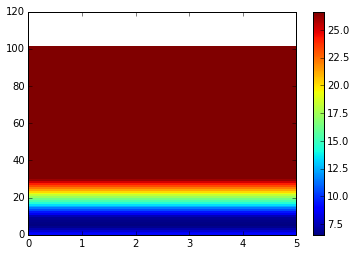

In [40]:
B=nc.Dataset('/data/eolson/MEOPAR/SS2DSOGruns/nuts_SOG5x5_S3-2014-10-19-WithMRubra.nc')
NO=B.variables['NO3']
Si=B.variables['Si']
PHY=B.variables['MYRI']
NH=B.variables['NH4']
plt.pcolormesh(NO[0,:,:,3]); plt.colorbar()

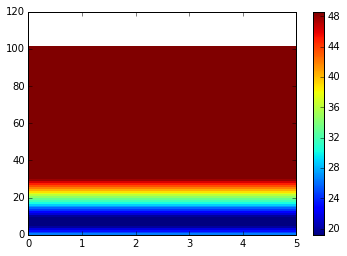

In [41]:

plt.pcolormesh(Si[0,:,:,3]); plt.colorbar()

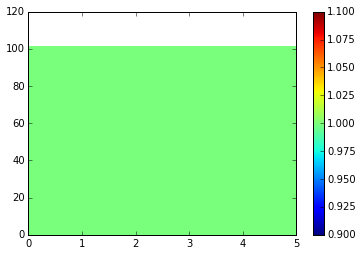

In [42]:

plt.pcolormesh(NH[0,:,:,3]); plt.colorbar()

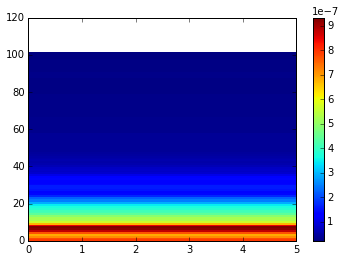

In [43]:

plt.pcolormesh(PHY[0,:,:,3]); plt.colorbar()

In [44]:
print( B.variables)

OrderedDict([('time_counter', <class 'netCDF4._netCDF4.Variable'>
float64 time_counter(time_counter)
    units: seconds since 2003-08-09 0:00:00
    long_name: Time axis
unlimited dimensions: time_counter
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('deptht', <class 'netCDF4._netCDF4.Variable'>
float64 deptht(deptht)
    units: m
    long_name: Depth
    positive: down
unlimited dimensions: 
current shape = (101,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('x', <class 'netCDF4._netCDF4.Variable'>
float64 x(y, x)
    units: metres
    long_name: streamwise
unlimited dimensions: 
current shape = (5, 5)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('y', <class 'netCDF4._netCDF4.Variable'>
float64 y(y, x)
    units: metres
    long_name: spanwise
unlimited dimensions: 
current shape = (5, 5)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('NO3', <class 'netCDF4._netCDF4.Variable'>
float64 NO3

In [45]:
B.close()